In [13]:
!wget https://www.dropbox.com/sh/slwb0e8ggqt6jzj/AABgGdMcctqVDU-ZcD5nM2K3a?dl=0n
A


--2020-12-05 22:58:14--  https://www.dropbox.com/sh/slwb0e8ggqt6jzj/AABgGdMcctqVDU-ZcD5nM2K3a?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/slwb0e8ggqt6jzj/AABgGdMcctqVDU-ZcD5nM2K3a [following]
--2020-12-05 22:58:14--  https://www.dropbox.com/sh/raw/slwb0e8ggqt6jzj/AABgGdMcctqVDU-ZcD5nM2K3a
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc196f390c3818995a0b6db95853.dl.dropboxusercontent.com/zip_download_get/An5YzeLwik9hcTR9GcBSvnUW1NPel6qeuEc0EESHS4Y3M2k9Sd9YTcHbGnpQi5DW88d3yE7OInDPTnDRdqUxb53n_eCdVfNnqj6NaHf3SXOIjg [following]
--2020-12-05 22:58:15--  https://uc196f390c3818995a0b6db95853.dl.dropboxusercontent.com/zip_download_get/An5YzeLwik9hcTR9GcBSvnUW1NPel6qeuEc0EESHS4Y3M2k9Sd9YTcHbGnpQi5DW88d3yE7OInDPTnDRdqUx

In [14]:
!unzip covid-19dataset

Archive:  covid-19dataset
mapname:  conversion of  failed
replace CovidDataset/Train/Covid/AR-2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: CovidDataset/Train/Covid/AR-2.jpg  
 extracting: CovidDataset/Train/Covid/AR-1.jpg  
 extracting: CovidDataset/Train/Covid/paving.jpg  
 extracting: CovidDataset/Val/Covid/4-x-day1.jpg  
 extracting: CovidDataset/Val/Covid/16654_1_1.png  
 extracting: CovidDataset/Val/Covid/16654_2_1.jpg  
 extracting: CovidDataset/Val/Covid/16654_4_1.jpg  
 extracting: CovidDataset/Train/Covid/16660_2_1.jpg  
 extracting: CovidDataset/Train/Covid/gr1_lrg-b.jpg  
 extracting: CovidDataset/Train/Covid/gr1_lrg-a.jpg  
 extracting: CovidDataset/Train/Covid/16660_4_1.jpg  
 extracting: CovidDataset/Train/Covid/16660_1_1.jpg  
 extracting: CovidDataset/Train/Covid/16660_3_1.jpg  
 extracting: CovidDataset/Train/Covid/16664_1_1.jpg  
 extracting: CovidDataset/Train/Covid/16672_1_1.jpg  
 extracting: CovidDataset/Train/Covid/16663_1_1.jpg  
 extracting: Covi

In [32]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Test"

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [34]:
#CNN model in Keras
#Sequential model
#layered architecture
#we are creating 3-4 CNN layers with some classification layers
#first we put a convolutional layer with 32 filers
#adding two layers increases the non-linearity and reduce the number of parameters
#as we go deeper into the network we increase the number of filters because as we go deeper the numeber of distinct patterns we see are more


model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  #single neuron
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54, 64)       

In [36]:
#trainning from scratch
#we use keras image generator library
#we can't do vertical flip as all the x-ray should have same orientation

train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_dataset=image.ImageDataGenerator(rescale=1./255)

In [37]:
#it automatically picks all the imges from the directory and converts it to 224,224

train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [38]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [39]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [41]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 0.6607 - accuracy: 0.6042 - val_loss: 0.6457 - val_accuracy: 0.9500
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 0.5656 - accuracy: 0.7083 - val_loss: 0.5470 - val_accuracy: 0.9000
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 0.3984 - accuracy: 0.8125 - val_loss: 0.3559 - val_accuracy: 0.9667
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.2488 - accuracy: 0.9010 - val_loss: 0.3115 - val_accuracy: 0.9333
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.3099 - accuracy: 0.8750 - val_loss: 0.1265 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.1707 - accuracy: 0.9375 - val_loss: 0.1095 - val_accuracy: 0.9833
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.1574 - accuracy: 0.9323 - val_loss: 0.1598 - val_accuracy: 0.9833
Epoch 8/10
6/6 [=========================

In [42]:
model.save("model.h5")

In [43]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.15161296725273132, 0.9642857313156128]

In [44]:
model.evaluate_generator(validation_generator)

[0.12164487689733505, 0.9833333492279053]

In [47]:
#test images
model=load_model("model.h5")

In [48]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [49]:
y_actual=[]

In [50]:
y_test=[]

In [52]:
import os

In [53]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [54]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [55]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cm=confusion_matrix(y_actual,y_test)

In [58]:
import seaborn as sns

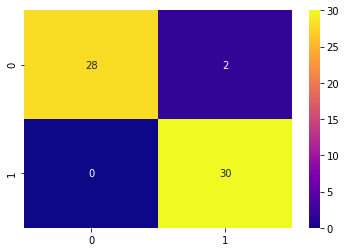

In [59]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [62]:
# 0,0 = true positive
# 0,1 = true negative
# 1,0 = false positive
# 1,1 = false negative